import some of the libraries that’ll be used within this program.

In [1]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# Twitter Api Credentials
consumerKey =''
consumerSecret =''
accessToken =''
accessTokenSecret =''

Now, it’s time to create the authentication object. Set the access token and access token secret, and authenticate to Twitter.

In [4]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

# Extract and Analyze the Data

It’s time to extract the tweets of a Twitter user. First, I’ll get the last 100 posts for the Twitter user Taylor Swift and show only the five most recent tweets.

In [19]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="taylorswift13", count = 100, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) Love her!! 
👏💕💐🥇🙏💕💐👏 https://t.co/fq8crQpbsh

2) Can’t wait to watch @Disclosure_Doc on @netflix today!! Executive produced by @Lavernecox who is extraordinary 💕💕💕 Who else is gonna watch?! https://t.co/tYnZXfYzk5

3) For my family, everything that has transpired recently gives us an opportunity to reflect, listen, and reprogram any part of our lives that hasn’t been loudly and ferociously anti-racist, and to never let privilege lie dormant when it could be used to stand up for what’s right.

4) Personally, I’ve made the decision to give all of my employees June 19th off in honor of Freedom Day from now on, and to continue to educate myself on the history that brought us to this present moment.

5) Happy Juneteenth! I want to thank @TheRoot and @RhapsoDani for allowing me to post this video about the significance of today, June 19th, and why it should be celebrated as a National holiday. https://t.co/7yjwh4Lddg



Create a DataFrame with a column called Tweets that’ll contain the posts from the Twitter user, and then show the first five rows.

In [20]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,Love her!! \n👏💕💐🥇🙏💕💐👏 https://t.co/fq8crQpbsh
1,Can’t wait to watch @Disclosure_Doc on @netfli...
2,"For my family, everything that has transpired ..."
3,"Personally, I’ve made the decision to give all..."
4,Happy Juneteenth! I want to thank @TheRoot and...


The data is a little dirty because it contains the @ symbol, hyperlinks, RTs, and may contain hash tags, so I’ll clean it up by creating a function to remove these symbols from the tweets. Then, I’ll apply that function to the tweets and show the results.

In [21]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,Love her!! \n👏💕💐🥇🙏💕💐👏
1,Can’t wait to watch _Doc on today!! Executive...
2,"For my family, everything that has transpired ..."
3,"Personally, I’ve made the decision to give all..."
4,Happy Juneteenth! I want to thank and for al...
...,...
95,Fur real guys this was my cake 🎂
96,: Oh and 13 made a great speech about the gend...
97,WHO’S GONNA TELL HER SHE’S THIRTAY NOW 🧁
98,When you’re pretttttty sure that if you were a...


I want to add the tweets’ subjectivity and polarity to the DataFrame. In order to do this, I’ll create two functions: one to get the tweets called Subjectivity (how subjective or opinionated the text is — a score of 0 is fact, and a score of +1 is very much an opinion) and the other to get the tweets called Polarity (how positive or negative the text is, — score of -1 is the highest negative score, and a score of +1 is the highest positive score).
Next I’ll store the results into two columns — one called Subjectivity and the other called Polarity — and show the results.

In [22]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,Love her!! \n👏💕💐🥇🙏💕💐👏,0.600000,0.781250
1,Can’t wait to watch _Doc on today!! Executive...,1.000000,0.416667
2,"For my family, everything that has transpired ...",0.528571,0.128571
3,"Personally, I’ve made the decision to give all...",0.150000,0.000000
4,Happy Juneteenth! I want to thank and for al...,0.875000,0.675000
...,...,...,...
95,Fur real guys this was my cake 🎂,0.300000,0.200000
96,: Oh and 13 made a great speech about the gend...,0.750000,0.800000
97,WHO’S GONNA TELL HER SHE’S THIRTAY NOW 🧁,0.000000,0.000000
98,When you’re pretttttty sure that if you were a...,0.888889,0.500000


Let’s see how well the sentiments are distributed. A good way to accomplish this task is by understanding the common words by plotting word clouds.
A word cloud (also known as text clouds or tag clouds) is a visualization, the more a specific word appears in the text, the bigger and bolder it appears in the word cloud.
Let’s visualize all the words in the data using the word-cloud plot. It looks like the word “health” appears a lot in Taylor Swift past 100 tweets.

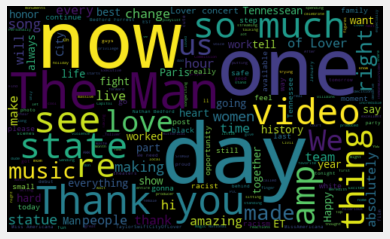

In [23]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Create a function to compute the negative (-1), neutral (0), and positive (+1) analysis, and add the information to a new column called Analysis. Then, show the results.

In [24]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,Love her!! \n👏💕💐🥇🙏💕💐👏,0.600000,0.781250,Positive
1,Can’t wait to watch _Doc on today!! Executive...,1.000000,0.416667,Positive
2,"For my family, everything that has transpired ...",0.528571,0.128571,Positive
3,"Personally, I’ve made the decision to give all...",0.150000,0.000000,Neutral
4,Happy Juneteenth! I want to thank and for al...,0.875000,0.675000,Positive
...,...,...,...,...
95,Fur real guys this was my cake 🎂,0.300000,0.200000,Positive
96,: Oh and 13 made a great speech about the gend...,0.750000,0.800000,Positive
97,WHO’S GONNA TELL HER SHE’S THIRTAY NOW 🧁,0.000000,0.000000,Neutral
98,When you’re pretttttty sure that if you were a...,0.888889,0.500000,Positive


Print the positive tweets in ascending order. The most positive tweet is the #1 tweet.

In [25]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:

1) Love her!! 
👏💕💐🥇🙏💕💐👏 

2) Can’t wait to watch _Doc on  today!! Executive produced by  who is extraordinary 💕💕💕 Who else is gonna watch?! 

3) For my family, everything that has transpired recently gives us an opportunity to reflect, listen, and reprogram any part of our lives that hasn’t been loudly and ferociously anti-racist, and to never let privilege lie dormant when it could be used to stand up for what’s right.

4) Happy Juneteenth! I want to thank  and  for allowing me to post this video about the significance of today, June 19th, and why it should be celebrated as a National holiday. 

5) YES!! Thank you to the Supreme Court Justices who voted in favor and all the advocates who have fought so hard for this! We still have a long way to go to reach equality, but this is a beautiful step forward. 🌈❤️🧡💛💚💙💜🌈 

6) This article written by  is a fascinating read about changing policy at the state and local levels. 

7) Racial injustice has been ingrained d

Plot the polarity and subjectivity as a scatter plot. It looks like the majority of the tweets are positive, as many of the points are on the right side of the polarity at value 0.00.

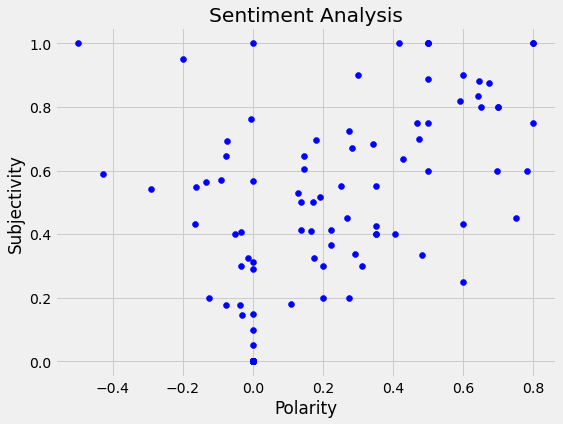

In [26]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

Print the percentage of positive tweets

In [27]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

56.0

Print the percentage of negative tweets

In [28]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

19.0

Show the value counts.

In [29]:
# Show the value counts
df['Analysis'].value_counts()

Positive    56
Neutral     25
Negative    19
Name: Analysis, dtype: int64

Visually show the value counts.

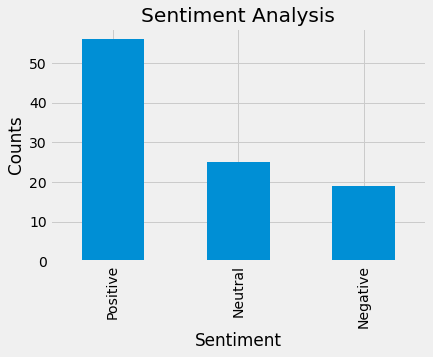

In [30]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()